In [1]:
# parsing GloVe word embeddings file

In [2]:
import os
from numpy import asarray

glove_dir = '../data'
embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.300d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [533]:
from pandas import read_pickle

df = read_pickle('../data/dataset_previo_final.pkl')
df = df[df.tweet_type =='original']

In [534]:
import os
from pandas import DataFrame, concat, read_csv
from numpy import isfinite

concat_df_labels = DataFrame()
cat_path = '../data/Categorizacion/'
for i in os.listdir(cat_path):
    print(cat_path + i)
    df_labels = read_csv(cat_path + i, sep=';', error_bad_lines=False)
    
    df_labels = df_labels[(df_labels['QUIEN'].astype(str) != '?')]
    df_labels['QUIEN'] = df_labels['QUIEN'].astype(float)
    df_labels['QUIEN'] = df_labels['QUIEN'].apply(lambda x: x - 1)
    df_labels['QUIEN'] = df_labels['QUIEN'].apply(lambda x: 0 if x == 0 or x == 1 else x)
    df_labels['QUIEN'] = df_labels['QUIEN'].apply(lambda x: 1 if x == 2 else x)
    df_labels['QUIEN'] = df_labels['QUIEN'].apply(lambda x: 2 if x == 3 or x == 4 else x)
    
    df_labels['full_text'] = df_labels['full_text'].astype(str)
    
    df_labels['Asesinato'] = df_labels['Asesinato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Violacion'] = df_labels['Violacion'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Agresion \nsexual'] = df_labels['Agresion \nsexual'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Maltrato'] = df_labels['Maltrato'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Acoso'] = df_labels['Acoso'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Miedo'] = df_labels['Miedo'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    df_labels['Asco\nTristeza\nRabia'] = df_labels['Asco\nTristeza\nRabia'].apply(lambda x: 1 if x == 'x' or x=='X' else 0)
    
    df_labels = df_labels[['id','tweet_id', 'user_name', 'QUIEN', 'Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia', 'full_text']]
    df_labels.set_index('id', inplace=True)
    df_labels = df_labels[isfinite(df_labels['QUIEN'])]
    
    concat_df_labels = concat([concat_df_labels, df_labels], axis=0)

../data/Categorizacion/Karma-Tabla 1.csv
../data/Categorizacion/Vicenc-Tabla 1.csv
../data/Categorizacion/Feliu-Tabla 1.csv
../data/Categorizacion/Laura-Tabla 1.csv
../data/Categorizacion/Diana-Tabla 1.csv
../data/Categorizacion/Sol-Tabla 1.csv
../data/Categorizacion/Camilo-Tabla 1.csv
../data/Categorizacion/Guillermo-Tabla 1.csv
../data/Categorizacion/Cristina-Tabla 1.csv
../data/Categorizacion/Carlos_G-Tabla 1.csv
../data/Categorizacion/Patricio-Tabla 1.csv
../data/Categorizacion/Luz-Tabla 1.csv
../data/Categorizacion/Maria-Tabla 1.csv
../data/Categorizacion/Juan-Tabla 1.csv
../data/Categorizacion/Irene-Tabla 1.csv
../data/Categorizacion/Fer-Tabla 1.csv
../data/Categorizacion/Carlos_C-Tabla 1.csv
../data/Categorizacion/Artur-Tabla 1.csv
../data/Categorizacion/Aniol-Tabla 1.csv
../data/Categorizacion/David-Tabla 1.csv


In [535]:
concat_df_labels.describe()

,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia
count,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000,10323.000000
mean,0.799089,0.038264,0.055313,0.111208,0.062676,0.141335,0.117214,0.190836
std,0.745932,0.191842,0.228602,0.314405,0.242390,0.348384,0.321691,0.392979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [536]:
concat_df_labels.sample(5)

,tweet_id,user_name,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia,full_text
id,,,,,,,,,,,
9.909674e+17,"9,91E+17",Mulata...,1.0,0,0,0,0,0,0,0,"Todos merecemos respeto, no veo por qué tanta ..."
9.913194e+17,"9,91E+17",king's wool,2.0,0,0,0,0,0,0,0,el pibe pone resentidas hijas de puta y el #cu...
9.907720e+17,"9,91E+17",Fernanda Morinigo,1.0,0,0,0,0,0,0,1,"No puedo con los tweets del #Cuentalo, que tri..."
9.901921e+17,"9,90E+17",Lau,0.0,0,0,0,0,1,0,0,"#Cuentalo Mi hermana, mi prima y un par suyas ..."
9.910040e+17,"9,91E+17",ℐohanna,1.0,0,0,0,0,0,0,0,Todxs hemos pasado por situaciones horribles y...


In [537]:
concat_df_labels.columns

Index(['tweet_id', 'user_name', 'QUIEN', 'Asesinato', 'Violacion',
       'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo',
       'Asco\nTristeza\nRabia', 'full_text'],
      dtype='object')

In [538]:
def get_category(x):
    if x['Asesinato']:
        return 0
    elif x['Violacion']:
        return 1
    elif x['Agresion \nsexual']:
        return 2
    elif x['Maltrato']:
        return 3
    elif x['Acoso']:
        return 4
    elif x['Miedo']:
        return 5
    elif x['Asco\nTristeza\nRabia']:
        return 6
    else:
        return 7

In [539]:
text_labels = ['Asesinato', 'Violacion', 'Agresion \nsexual', 'Maltrato', 'Acoso', 'Miedo', 'Asco\nTristeza\nRabia']

In [540]:
concat_df_labels['category'] = concat_df_labels[text_labels].apply(get_category, axis=1)
concat_df_labels['unlabeled'] = concat_df_labels['category'].apply(lambda x: 1 if x == 7 else 0)

In [541]:
import spacy
nlp = spacy.load('es')

def keep_meaningful_words(word):
    processed = nlp(word)
    result = [token.lemma_ for token in processed if token.pos_ in ('NOUN', 'VERB', 'ADJ', 'ADV')]
    return ' '.join(result)

random_tweet = df['full_text'].iloc[1001]
print(random_tweet)
print('-' * 30)
print(keep_meaningful_words(random_tweet))

Cuando tenía 7, un vecino de 17 se aprovechó sistemáticamente de mi durante varios meses y en diferentes situaciones. A los doce años fue la primera vez que pude hablar del tema, porque todo ese tiempo sentí que fue mi culpa, que me deje, me odiaba. Tenía 7 años. #cuéntalo
------------------------------
tener vecino aprovechar sistemáticamente mesar situación año primero vez hablar temer tiempo sentir culpar dejar odiar Tenía año # cuéntalo


In [542]:
concat_df_labels['filtered_text'] = concat_df_labels['full_text'].apply(keep_meaningful_words)

In [543]:
concat_df_labels.sample()

,tweet_id,user_name,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia,full_text,category,unlabeled,filtered_text
id,,,,,,,,,,,,,,
9.899557e+17,"9,90E+17",🌸Teresa Tejeda 🎼,0.0,0,0,1,0,0,0,0,#cuéntalo con 17 en una zona de bares un tío m...,2,0,cuéntalo zona bar tío dar cachete culo decir h...


In [544]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(concat_df_labels['QUIEN'])
concat_df_labels['y'] = y

In [545]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y.reshape(len(y), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [546]:
labels = onehot_encoded

In [547]:
n_classes = 3

In [548]:
concat_df_labels.shape

(10323, 15)

In [549]:
texts = concat_df_labels['full_text'].values.tolist()

In [550]:
len(texts)

10323

In [551]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

input_length = 60  
training_samples = 5000  
validation_samples = 4000
max_words = 20000
maxlen=60

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 24134 unique tokens.


In [552]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data[training_samples+validation_samples:]
y_test = labels[training_samples+validation_samples:]

In [553]:
concat_df_labels.QUIEN.value_counts() / concat_df_labels.QUIEN.value_counts().sum() 

1.0    0.403274
0.0    0.398818
2.0    0.197908
Name: QUIEN, dtype: float64

In [554]:
from numpy import asarray, arange
labels = asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = arange(labels.shape[0])
data = data[indices]
labels = labels[indices]

Shape of data tensor: (10323, 60)
Shape of label tensor: (10323, 3)


In [555]:
concat_df_labels.head()

,tweet_id,user_name,QUIEN,Asesinato,Violacion,Agresion sexual,Maltrato,Acoso,Miedo,Asco Tristeza Rabia,full_text,category,unlabeled,filtered_text,y
id,,,,,,,,,,,,,,,
9.912126e+17,"9,91E+17",#Cuéntalo,0.0,0,0,0,0,0,0,0,"Que mal que están, NO es un no..Lo cuento por ...",7,1,mal NO no contar ya tener temor #Cuéntalo http...,0
9.910180e+17,"9,91E+17",Osorio.,1.0,0,0,0,0,0,0,0,Lo más impactante del #Cuéntalo es ver como en...,7,1,más impactante mujer tan frecuente agresión ve...,1
9.909857e+17,"9,91E+17",MYKONOS,1.0,0,0,0,0,0,0,0,Yo solo quiero hacer una pregunta..La posibili...,7,1,solo querer hacer preguntar posibilidad conoce...,1
9.909516e+17,"9,91E+17",Dante,2.0,0,0,0,0,0,0,0,#Cuentalo .https://t.co/Xt9sXceyoL,7,1,Xt9sXceyoL,2
9.907996e+17,"9,91E+17",Oskar Ascencio,1.0,0,0,0,0,0,0,0,Leo los tuits de #Cuentalo y no entiendo como ...,7,1,Leo tuits no entender hombre maldito,1


In [556]:
text_labels = ['1a persona o 2a persona', 'apoyo', 'others & trolls']

In [557]:
from numpy import zeros
embedding_dim = 300
vocabulary_size = 20000
embedding_matrix = zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [558]:
NUM_EPOCHS=15
BATCH_SIZE=16

## CNN + LSTM

In [559]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, LSTM
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_dim, input_length=input_length, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(50))#, return_sequences=True))
model.add(Dropout(0.3))
#model.add(LSTM(25))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 60, 300)           6000000   
_________________________________________________________________
dropout_82 (Dropout)         (None, 60, 300)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 56, 32)            48032     
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 14, 32)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 50)                16600     
_________________________________________________________________
dropout_83 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 64)                3264      
__________

In [560]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [561]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=NUM_EPOCHS,
                    batch_size=BATCH_SIZE, 
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.hy')

Train on 5000 samples, validate on 4000 samples
Epoch 1/15
5000/5000 [==============================] - 13s 3ms/step - loss: 0.9072 - acc: 0.6104 - val_loss: 0.6587 - val_acc: 0.7475
Epoch 2/15
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6968 - acc: 0.7278 - val_loss: 0.6138 - val_acc: 0.7460
Epoch 3/15
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6697 - acc: 0.7462 - val_loss: 0.6064 - val_acc: 0.7825
Epoch 4/15
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6280 - acc: 0.7658 - val_loss: 0.5401 - val_acc: 0.7937
Epoch 5/15
5000/5000 [==============================] - 8s 2ms/step - loss: 0.5812 - acc: 0.7734 - val_loss: 0.6384 - val_acc: 0.7685
Epoch 6/15
5000/5000 [==============================] - 8s 2ms/step - loss: 0.5529 - acc: 0.7956 - val_loss: 0.6010 - val_acc: 0.7618
Epoch 7/15
5000/5000 [==============================] - 8s 2ms/step - loss: 0.5153 - acc: 0.8134 - val_loss: 0.5822 - val_acc: 0.7808
Epoch 8/15
50

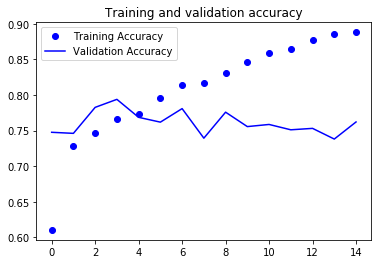

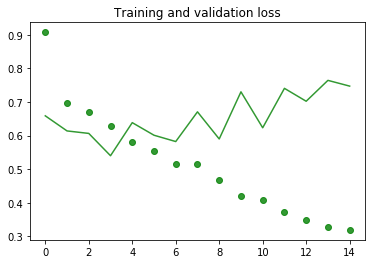

In [562]:
import matplotlib.pyplot as plt
    
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', alpha=0.8)
plt.plot(epochs, val_loss, 'g', alpha=0.8)
plt.title('Training and validation loss')
plt.show()

In [563]:
score = model.evaluate(x_test, y_test,
                       batch_size=BATCH_SIZE, verbose=1)
 
print('Test accuracy:', score[1])

1323/1323 [==============================] - 0s 355us/step
Test accuracy: 0.7664399094772627


In [564]:
text_labels = enc.classes_
from numpy import argmax, array
 
for i in range(10):
    prediction = model.predict(array([x_test[i]]))
    predicted_label = text_labels[argmax(prediction[0])]
    print('Actual label:', y_test[i])
    print("Predicted label: ", predicted_label)

Actual label: [0. 1. 0.]
Predicted label:  0.0
Actual label: [0. 1. 0.]
Predicted label:  0.0
Actual label: [0. 0. 1.]
Predicted label:  2.0
Actual label: [1. 0. 0.]
Predicted label:  0.0
Actual label: [1. 0. 0.]
Predicted label:  2.0
Actual label: [1. 0. 0.]
Predicted label:  0.0
Actual label: [0. 0. 1.]
Predicted label:  2.0
Actual label: [1. 0. 0.]
Predicted label:  0.0
Actual label: [0. 1. 0.]
Predicted label:  1.0
Actual label: [0. 0. 1.]
Predicted label:  2.0


In [565]:
y_pred = model.predict(x_test)
preds = y_pred.argmax(axis=1)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = preds.reshape(len(preds), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [566]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(concat_df_labels['QUIEN'].values[-len(y_pred):], y_pred.argmax(axis=1))#, labels=text_labels)
print('*'*40)
print(cm)
print('*'*40)

****************************************
[[462  37  13]
 [ 86 383  65]
 [ 53  55 169]]
****************************************


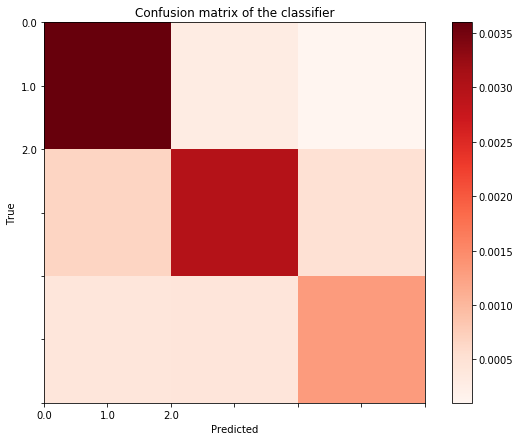

In [567]:
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.imshow(cm/df.shape[0], cmap='Reds', )
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax, )
ax.set_xticklabels(text_labels)
ax.set_yticklabels(text_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

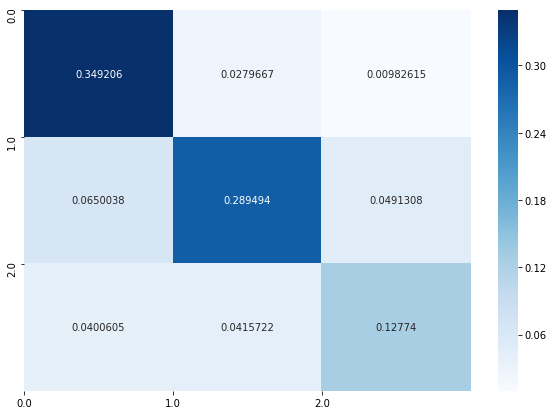

In [568]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm/len(y_pred), annot=True, cmap='Blues', fmt='g')
ax.xaxis.set_label_position('top')
plt.xticks(range(3),text_labels)
plt.yticks(range(3),text_labels)
plt.show()

### Let's evaluate with unseen observations

In [569]:
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(texts)
df2 = df[~df.full_text.isna()]
 
texts = df2['full_text'].values.tolist()
sequences = tokenizer.texts_to_sequences(texts)

print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 24134 unique tokens.


In [570]:
y_preds = model.predict(data)
preds = y_preds.argmax(axis=1)

In [571]:
text_labels = ['1a & 2a p.', 'apoyo', 'otros & trolls']

Cómo me duele este ht #cuéntalo


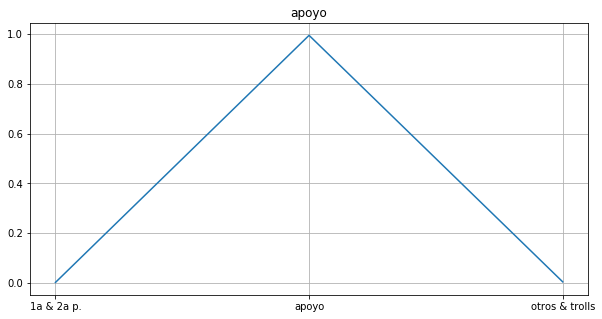

Cuando tenía 7, un vecino de 17 se aprovechó sistemáticamente de mi durante varios meses y en diferentes situaciones. A los doce años fue la primera vez que pude hablar del tema, porque todo ese tiempo sentí que fue mi culpa, que me deje, me odiaba. Tenía 7 años. #cuéntalo


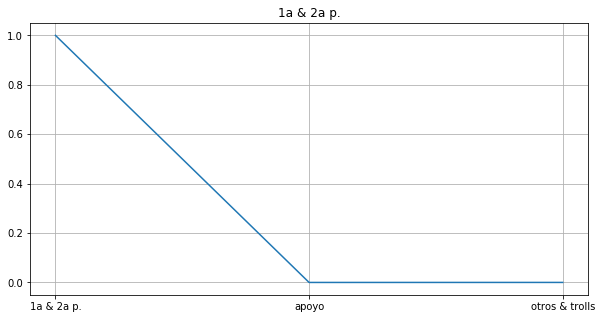

#Cuentalo quiero que seais libres, no valiente


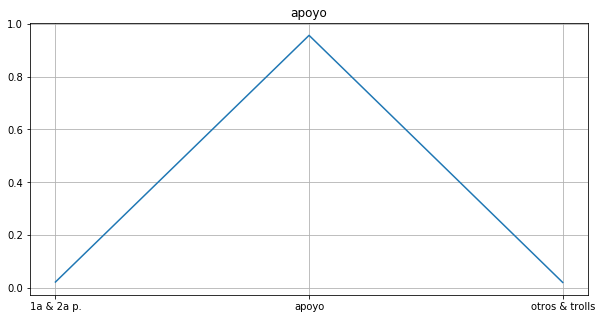

Un dia paseando por la calle pasé por un bar donde unos hombres me gritaron "ojala disfrutar de esas tetas".
#Cuentalo


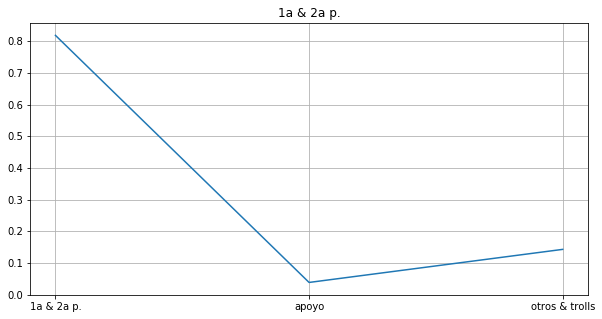

#Cuéntalo por todos los #taxistas que dejan en casa, lo más cerca del portal, a las más jóvenes a ciertas horas, aunque no tengan suficiente dinero para pagar.
#Valores #Proteccion


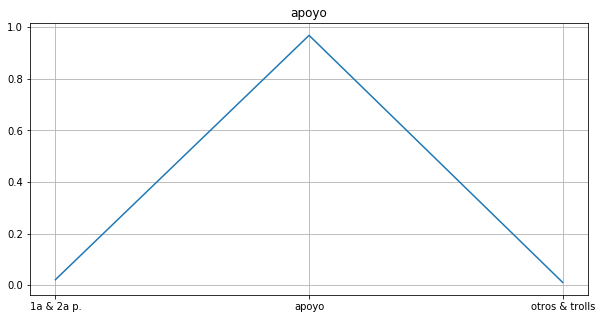

Mi padre teniendo que meterse en el tren que llevaba a mi hermana al trabajo para ponerle las cosas claros a un exnovio que la perseguía y acosaba. #Cuéntalo


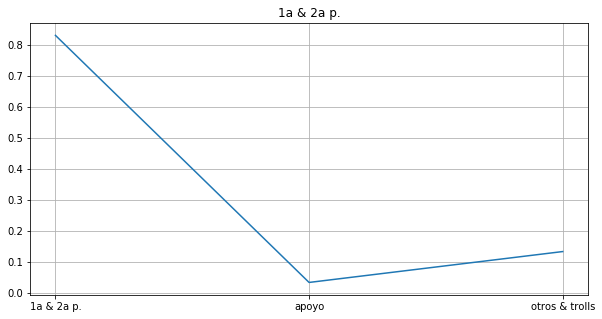

Periodistas, escritoras, políticas y tuiteras convierten #Cuéntalo en tendencia mundial - https://t.co/6jQzx44MNL http%3A%2F%https://t.co/rSvVCeqzuI%2Ftremending%2F2018%2F04%2F28%2Fperiodistas-escritoras-politicas-y-tuiteras-convierten-cuentalo-en-tendencia-mundial-2%2F


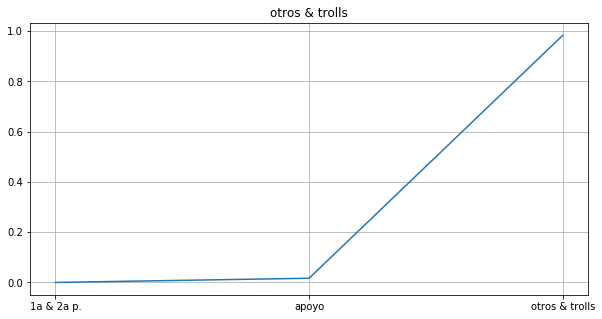

#Cuéntalo He pasado por: 1. Acoso verbal callejero. Desde hombres entre 20 y 50 años en calles de Málaga hasta por mis propios vecinos en mi pueblo, que tendrían 12 años. Ésto sin olvidar a los conductores que te gritan cosas desde los coches.


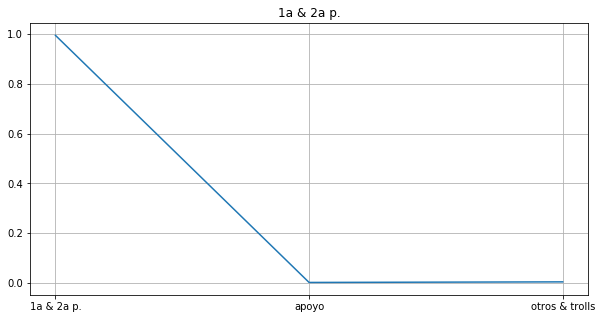

Lo peor es que "doy gracias" a que lo mas que me ha pasado son gritos por la calle o que me chisten.
Que me giré cada poco tiempo o que corra antes de llegar al portal cuando vuelvo sola de noche a casa y tengo que estar con el móvil en una mano y las llaves en la otra #cuéntalo


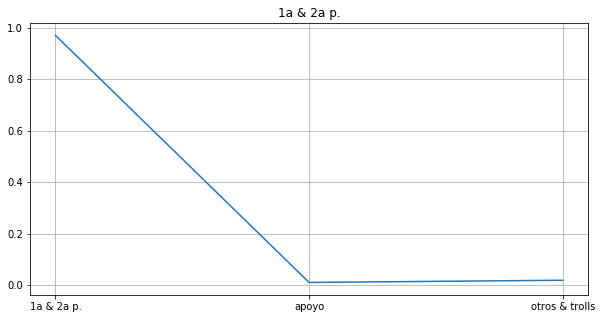

Volvía de una fiesta con una amiga, teniamos que coger un taxi para llegar a casa, a la hora de coger el taxi lo primero que pensamos fue maneras de escapar de ese coche, íbamos con miedo.
Respiramos aliviadas cuando al entrar conducía una mujer.  #Cuentalo


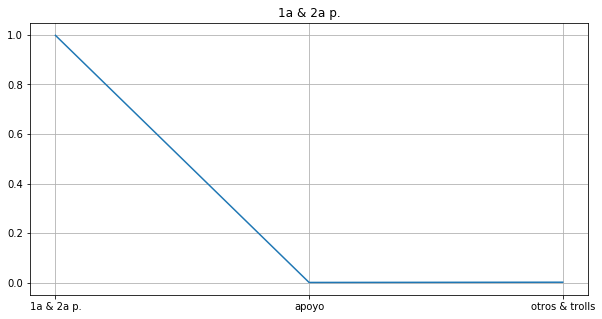

#Cuentalo  18 años estaba con una amiga esperando en la puerta de las oficinas de un progama de radio, cuando aparecen dos hombres de unos 50-56 años se nos acercan y nos dicen que si nos pagan una habitación de hotel y 100 euros a cada una, que lo pasaríamos bien.


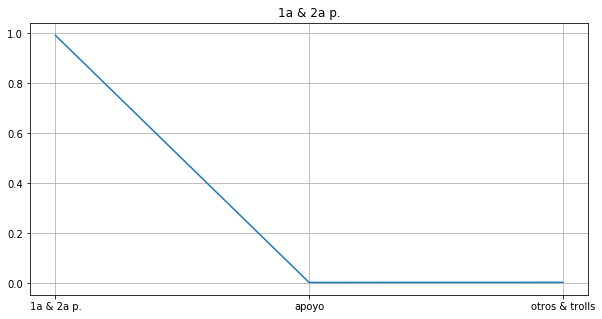

Por ej: el verano pasado, estaba esperando a mi novio en un banco y se me sienta un hombre a mi lado. Empezó a preguntarme cosas sospechosas y a acercarse. Si mi novio llega a tardar mas en venir no sé qué me hubiera hecho.
#Cuéntalo


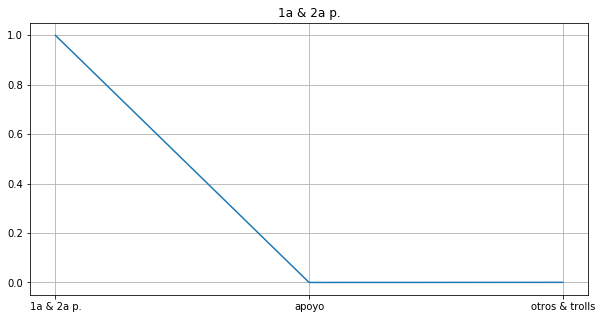

#cuéntalo #FAQSnoesnoTV3 @BeatrizTalegon tu valentia es la nuestra. Llevo todo el programa redactando mi experiencia, pero es demasiado larga, demasiado intensa, demasiado dolorosa...


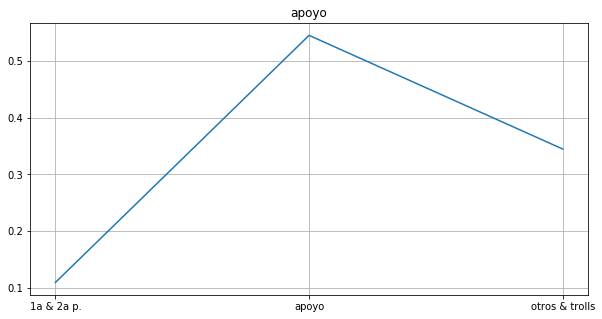

#cuéntalo Feia uns dies que havia acabat la Selectivitat, 18 anys, vaig entrar al portal de casa i hi havia un individu que em va agafar per darrera. Li vaig clavar les ungles i va fugir. Vaig pujar a casa tan ràpid que em va caure una lentilla.


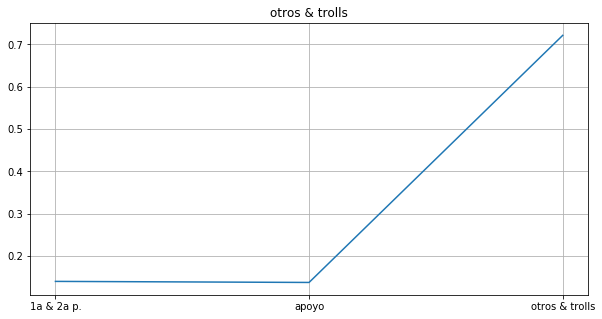

Gilipollas nivel hacerse una cuenta nueva para meterse a atacar a la gente que twittea con lo de #Cuentalo.

Podéis iros por dónde habéis venido, gilipollas.


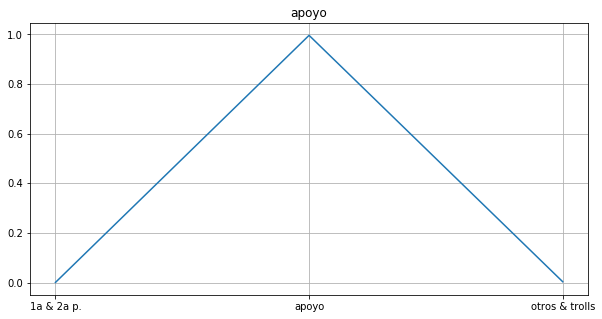

#Cuentalo tristemente, era el típico que decía que "no somos todos". Coño, me doy cuenta de lo idiota que he sido porque la realidad es que, "si que os ha pasado a todas". Esperanzado de que con esto, os unáis y os deis cuenta que no estáis solas


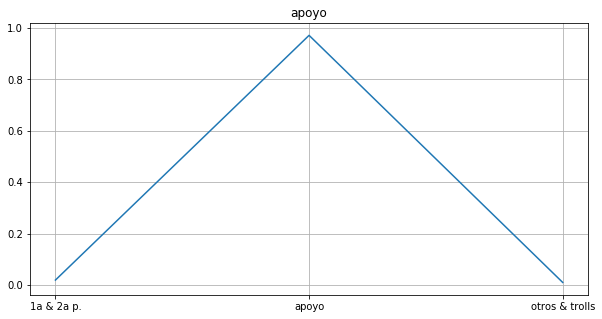

#Cuentalo https://t.co/JYJf0l6J4r


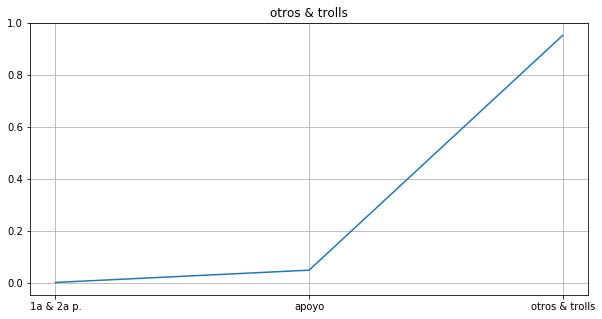

#Cuentalo. Si, jo també. Tenia 8 o 9 anys. Ell uns 17 o 18. Em deia que estudiava per metge, que m’havia de despullar. Em va tocar per tot arreu. Culpable durant molt temps. Curiós que mai ni ho vaig explicar. Fins ara.


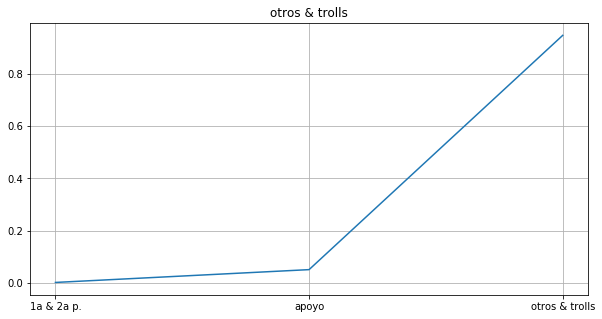

No suelo contar cosas mías personales por aquí, pero lo del #cuéntalo son cosas que nunca me he atrevido a contar a nadie y que se han quedado marcadas como cicatrices dentro de mi.


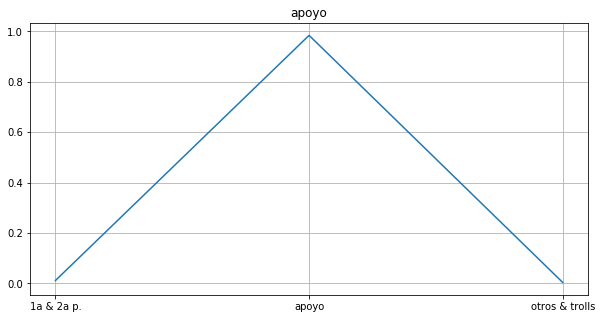

Estar en una discoteca y que haya chicos que aprovechen para tocarme o besarme. Nose cuantas cobras hice en una sola noche #cuentalo


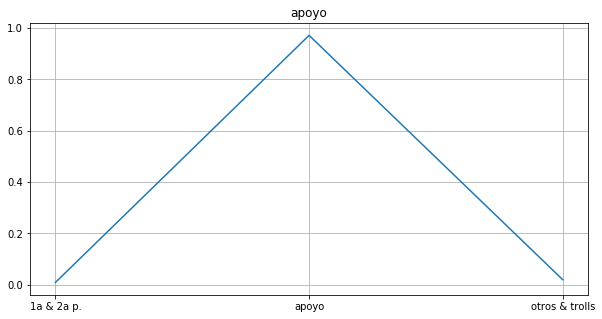

Estaba con un chico en un parque, nos besábamos, vino un chico más mayor, comenzó a decir que qué pechos tenía, que los quería tocar, muerta de miedo y paralizada vi como metía su mano por mi camisa y me manoseaba, el chico con el que estaba se quedó paralizado también #cuéntalo


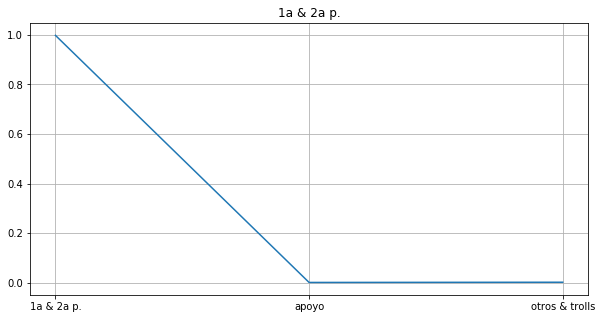

#Cuéntalo Salgo del colegio, voy caminando a casa. Un tipo me sigue varias cuadras diciéndome porquerías. Cuando se me intenta acercar corro hasta el conjunto donde vive mi tía. Entro corriendo a la portería donde hay una vigilante que no entiende por qué me escondo donde ella +


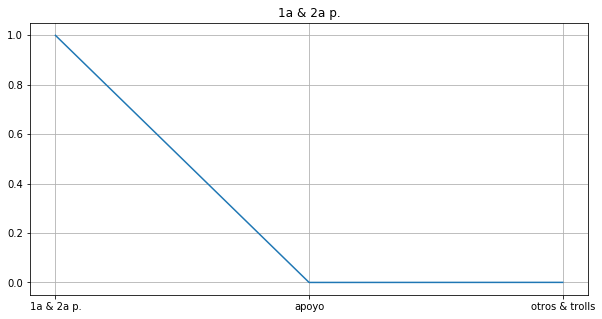

Jo he estat violada pel meu marit (ara ex marit). Era la meva obligació com a esposa. 
Toquetejada pel meu cunyat una nit, per anar beguda. 
I tot callat per vergonya. 
Ja n'hi-ha prou!
#FAQSnoesnoTV3 
#Cuéntalo


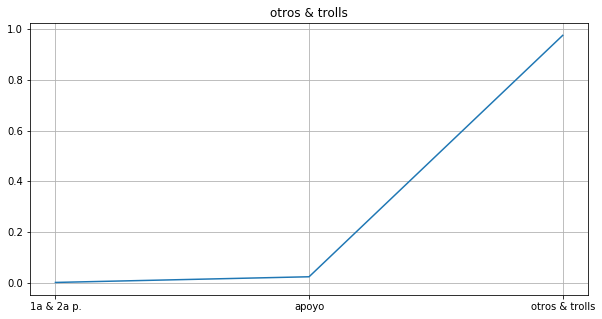

Del hashtag #cuéntalo me quedo con la reflexión de que en este planeta nadie, en ningún sitio, conoce a una sola mujer que no haya sido tocada sin su permiso y en consecuencia humillada por un señoro hetero random.


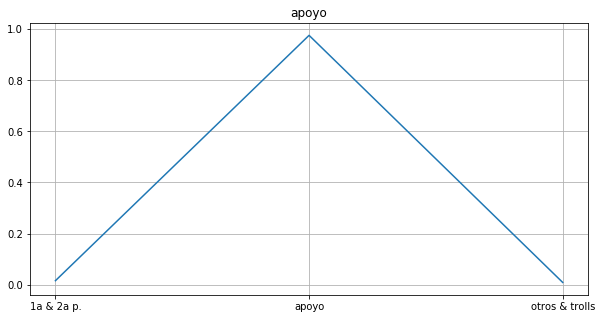

#FAQSnoesnoTV3 NO VOLEM SER VALENTES, VOLEM SER LLIURES!! #nomésSIésSI #cuéntalo


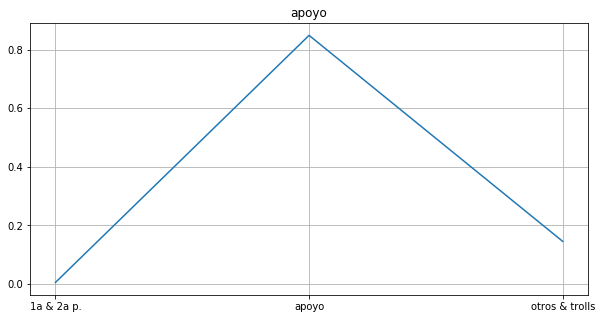

#Cuentalo Llego a casa a las 8 y media de la tarde, hay un hombre tumbado en el portal, llamo a mi padre y a mis primos por miedo a pasar delante de él. Cuando hablaron con el para que me dejaste entrar me hicieron parecer una loca.


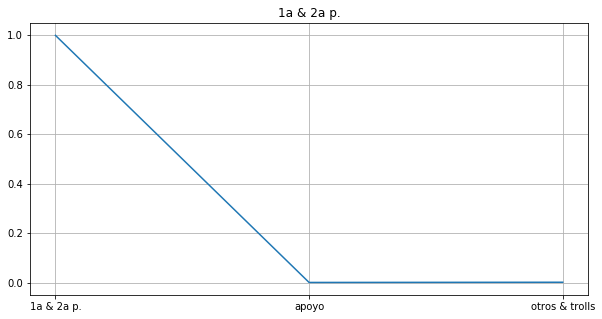

#Cuéntalo Hoy mismo en el bus a clase de cada día como cada semana. El hombre que acosa a las chicas una vez más, una vez más que tengo que avisar a alguna chavala una vez más que se baja sin decir nada para volver a subir una vez más.


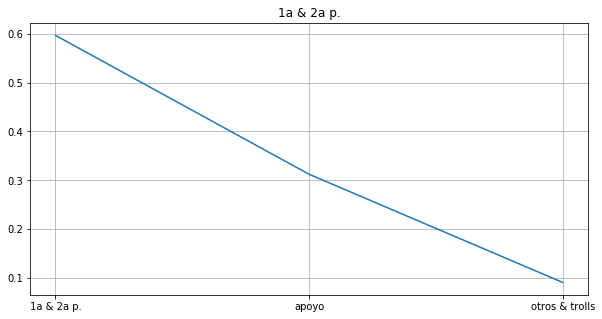

Estic molt commocionat al donar-me compte, llegint tuits #cuentalo i mirant el FAQS, de la gran quantitat de dones que han patit assetjament sexual d’una o altra manera. Em farien avergonyir de ser home


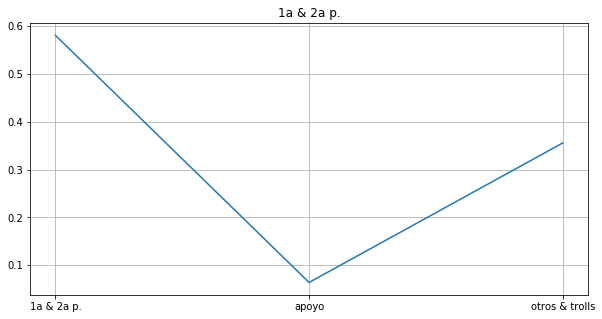

En la jornada del #Cuentalo , esta es la portada que decide sacar ABC: https://t.co/huWOJ1bxS9


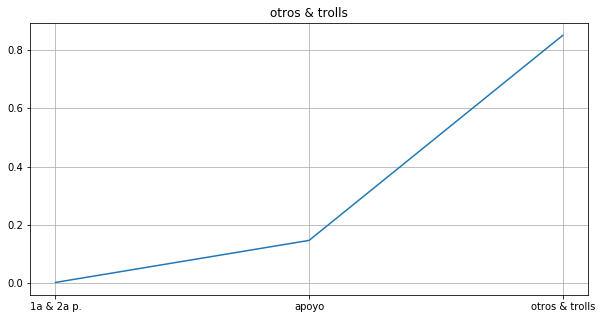

Me dedico a viajar sola. Me gusta hacerlo. Mi madre me ha comprado un spray pimienta, yo no quiero llevarlo, pero sé que debo. Y un spray legal, no vaya a ser que me abusen y termine pagando yo por un spray “ilegal”. #cuentalo


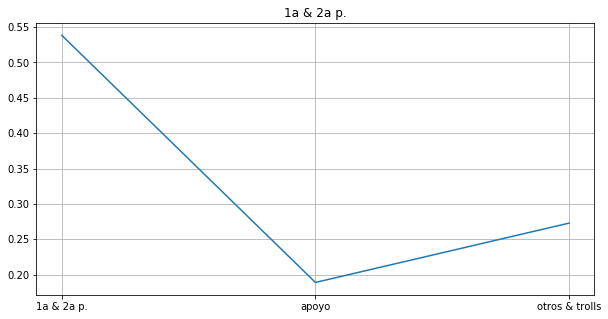

In [572]:
for i in range(1000, 1030):
    print(texts[i])
    plt.figure(figsize=(10, 5))
    plt.plot(y_preds[i])
    plt.title(text_labels[y_preds[i].argmax()])
    plt.xticks(range(3), text_labels)
    plt.grid(True)
    plt.show()

In [573]:
count = 0
for i in df[1000:1100].iterrows():
    print('*' * 50)
    print(i[1]['full_text'])
    print('Classified as: {}'.format(text_labels[preds[count]]))
    print('*' * 50)
    count += 1

**************************************************
Cómo me duele este ht #cuéntalo
Classified as: 1a & 2a p.
**************************************************
**************************************************
Cuando tenía 7, un vecino de 17 se aprovechó sistemáticamente de mi durante varios meses y en diferentes situaciones. A los doce años fue la primera vez que pude hablar del tema, porque todo ese tiempo sentí que fue mi culpa, que me deje, me odiaba. Tenía 7 años. #cuéntalo
Classified as: otros & trolls
**************************************************
**************************************************
#Cuentalo quiero que seais libres, no valiente
Classified as: 1a & 2a p.
**************************************************
**************************************************
Un dia paseando por la calle pasé por un bar donde unos hombres me gritaron "ojala disfrutar de esas tetas".
#Cuentalo
Classified as: 1a & 2a p.
**************************************************
************

**************************************************
Casi era una niña, en el cine un hombre me toco el muslo, tarde en reaccionar pq  quede aterrada, reaccione y logre q le echaran. #Cuentalo
Classified as: apoyo
**************************************************
**************************************************
#Cuentalo anar pel carrer fent veure que parles per telefòn, escoltar comentaris maxistes a qualsevol hora del dia, anar amb les claus a la mà com a arma contra qualsevol atac i altres situacions que no s’han de normalitzar a la meva vida. #FAQSnoesnoTV3
Classified as: apoyo
**************************************************
**************************************************
#cuéntalo Que nadie se olvide él caso de Nabila Rifo 👇🏻 https://t.co/3j9IzkP4rd
Classified as: 1a & 2a p.
**************************************************
**************************************************
Desde que era pequeña y no hace menos de dos años un familiar me acosaba y me intentaba tocar y darm

## append these columns to the old dataset with the class probability

In [574]:
data.shape

(128396, 60)

In [575]:
all_preds = model.predict_proba(data)
all_preds

array([[9.9943453e-01, 1.1650523e-04, 4.4887481e-04],
       [1.2225899e-03, 2.2992709e-01, 7.6885039e-01],
       [8.1914312e-01, 1.4094782e-01, 3.9909046e-02],
       ...,
       [1.9495398e-01, 7.2998077e-01, 7.5065255e-02],
       [5.8783126e-01, 7.5873472e-02, 3.3629522e-01],
       [7.5575481e-03, 9.8411870e-01, 8.3238697e-03]], dtype=float32)

In [576]:
from pandas import DataFrame

df_preds = DataFrame(all_preds, index=df2.index, columns=['pred_1a2a_persona', 'pred_apoyo', 'pred_otros_trolls'])
df_preds.head()

,pred_1a2a_persona,pred_apoyo,pred_otros_trolls
tweet_id,,,
990380122082611200,0.999435,0.000117,0.000449
990380024703447040,0.001223,0.229927,0.768850
990380009549434882,0.819143,0.140948,0.039909
990380001202761728,0.998622,0.000190,0.001188
990379986564669441,0.000764,0.998666,0.000570


In [577]:
df_preds.to_csv('df_only_preds_who_2.csv')

In [527]:
from pandas import merge

concat([df, df_preds], axis=1).to_csv('df_predicted_probs7.csv')

In [528]:
concat([df, df_preds], axis=1).shape

(160470, 46)

In [529]:
df_preds.shape

(160470, 3)